In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df.User_ID.value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [6]:
df.columns=['uid','pid','male','age','job','city','yrs','mar','p1','p2','p3','price']
df.head()

,uid,pid,male,age,job,city,yrs,mar,p1,p2,p3,price
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.male=df.male.replace({'M':1,'F':0})

In [8]:
df.city=df.city.replace({'A':0,'B':1,'C':2})

In [9]:
df.yrs.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: yrs, dtype: int64

In [17]:
df.pid.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00073342       1
P00299342       1
P00063642       1
P00126742       1
P00077342       1
Name: pid, Length: 3631, dtype: int64

In [11]:
df.yrs=df.yrs.replace({'4+':4})
df.yrs=df.yrs.astype(int)

In [12]:
df.age=df.age.replace({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [13]:
df.head()

,uid,pid,male,age,job,city,yrs,mar,p1,p2,p3,price
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [14]:
df.head(20)

,uid,pid,male,age,job,city,yrs,mar,p1,p2,p3,price
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969
5,1000003,P00193542,1,2,15,0,3,0,1,2.0,NaN,15227
6,1000004,P00184942,1,4,7,1,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,4,7,1,2,1,1,15.0,NaN,15854
8,1000004,P0097242,1,4,7,1,2,1,1,16.0,NaN,15686
9,1000005,P00274942,1,2,20,0,1,1,8,NaN,NaN,7871


In [21]:
df.pid=df.pid.str.replace(r'[^0-9]+',' ')
df.pid=df.pid.astype('int')
df.head()

,uid,pid,male,age,job,city,yrs,mar,p1,p2,p3,price
0,1000001,69042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,87842,0,0,10,0,2,0,12,NaN,NaN,1422
3,1000001,85442,0,0,10,0,2,0,12,14.0,NaN,1057
4,1000002,285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [22]:
df.dtypes

uid        int64
pid        int32
male       int64
age        int64
job        int64
city       int64
yrs        int32
mar        int64
p1         int64
p2       float64
p3       float64
price      int64
dtype: object

In [23]:
df.p2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: p2, dtype: int64

In [24]:
df.p3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: p3, dtype: int64

In [25]:
df.p2.fillna(0,inplace=True)
df.p3.fillna(0,inplace=True)

In [27]:
df.p2=df.p2.astype('int')
df.p3=df.p3.astype('int')

In [28]:
df.head()

,uid,pid,male,age,job,city,yrs,mar,p1,p2,p3,price
0,1000001,69042,0,0,10,0,2,0,3,0,0,8370
1,1000001,248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,87842,0,0,10,0,2,0,12,0,0,1422
3,1000001,85442,0,0,10,0,2,0,12,14,0,1057
4,1000002,285442,1,6,16,2,4,0,8,0,0,7969


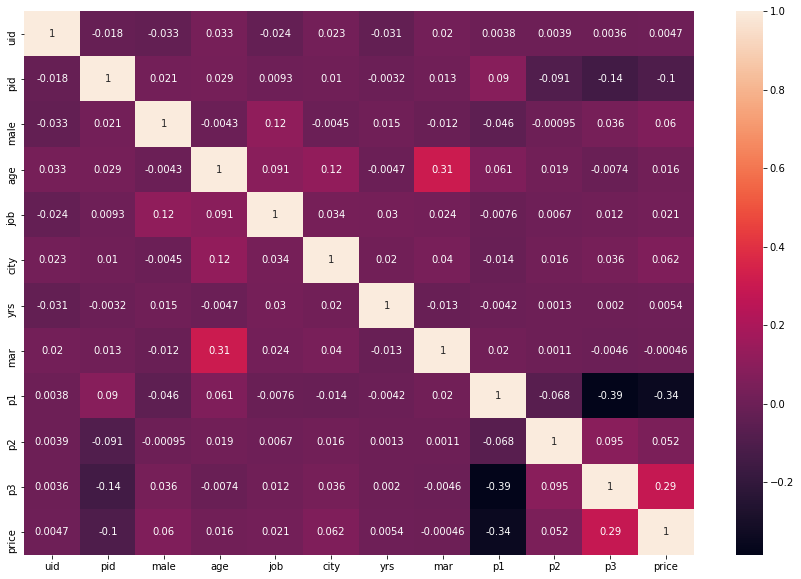

In [31]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [32]:
x=df.drop('price',axis=1)
y=df.price

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=0,shuffle=True)
model1=LinearRegression()
score1=cross_val_score(model1,x,y,cv=kf).mean()
score1

0.15518780133906632

In [37]:
test=pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [40]:
df=test.copy()
df.columns=['uid','pid','male','age','job','city','yrs','mar','p1','p2','p3']
df.male=df.male.replace({'M':1,'F':0})
df.city=df.city.replace({'A':0,'B':1,'C':2})

In [41]:
df.yrs=df.yrs.replace({'4+':4})
df.yrs=df.yrs.astype(int)
df.age=df.age.replace({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
df.pid=df.pid.str.replace(r'[^0-9]+',' ')
df.pid=df.pid.astype('int')
df.p2.fillna(0,inplace=True)
df.p3.fillna(0,inplace=True)
df.p2=df.p2.astype('int')
df.p3=df.p3.astype('int')

In [43]:
model1.fit(x,y)
df['price']=model1.predict(df)

In [44]:
submit=pd.read_csv('sample_submission_V9Inaty.csv')
submit.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [46]:
submit.Purchase=df['price']